In [1]:
# Null Hypothesis (H0): There is no significant difference in the economic indicators of Pakistan before and after the Indian demonetization event.

# Alternative Hypothesis (HA): The Indian demonetization event had a significant impact on the economic indicators of Pakistan, either positive or negative.


import pandas as pd

CG_DEBT_GDP_Pak = pd.read_csv('CG_DEBT_GDP_Pak.csv')
PPPPC_Pak = pd.read_csv('PPPPC_Pak.csv')

In [3]:
CG_DEBT_GDP_Pak = CG_DEBT_GDP_Pak.rename(columns={'Pakistan': 'CG_DEBT_GDP_Pak'})
PPPPC_Pak = PPPPC_Pak.rename(columns={'Pakistan': 'PPPPC_Pak'})

In [4]:
df = CG_DEBT_GDP_Pak.merge(PPPPC_Pak, on='Year')
df.head()
df_before = df[df['Year'] <= 2016]
df_after = df[df['Year'] > 2016]

In [5]:
from scipy.stats import ttest_ind

# select the columns to compare
cols_to_compare = ['CG_DEBT_GDP_Pak', 'PPPPC_Pak']

CG_DEBT_GDP_Pak - t-statistic: -1.822, p-value: 0.142
PPPPC_Pak - t-statistic: -2.996, p-value: 0.040
CG_DEBT_GDP_Pak - Shapiro-Wilk test - before: p-value = 0.014
CG_DEBT_GDP_Pak - Shapiro-Wilk test - after: p-value = 0.439
PPPPC_Pak - Shapiro-Wilk test - before: p-value = 0.441
PPPPC_Pak - Shapiro-Wilk test - after: p-value = 0.630
CG_DEBT_GDP_Pak - Levene's test: p-value = 0.339
PPPPC_Pak - Levene's test: p-value = 0.435
CG_DEBT_GDP_Pak - Wilcoxon rank-sum test: p-value = 0.050
PPPPC_Pak - two-sample t-test: t-statistic = -2.996, p-value = 0.040


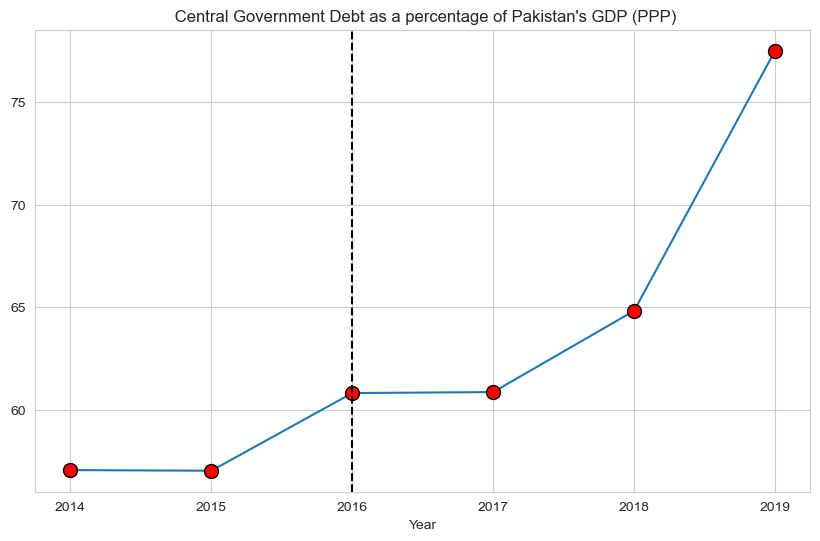

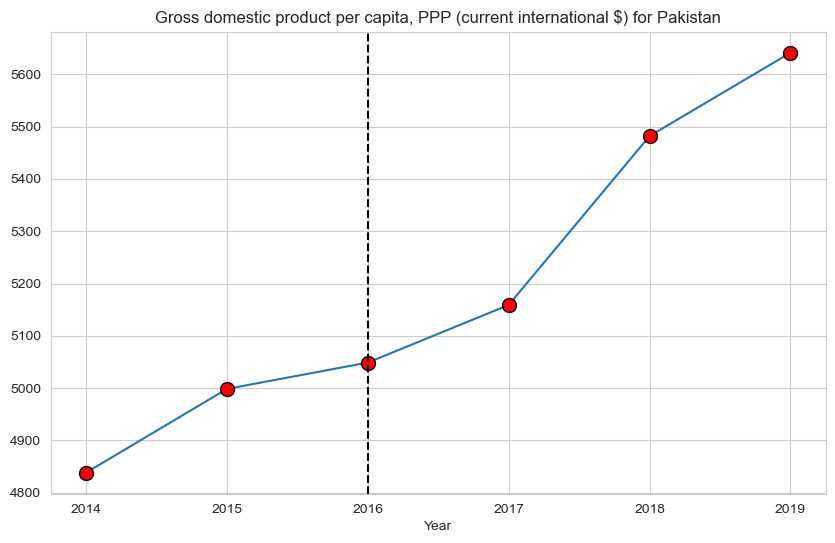

In [7]:
# perform the two-sample t-test for each column
for col in cols_to_compare:
    t_stat, p_val = ttest_ind(df_before[col], df_after[col], equal_var=True)
    print(f'{col} - t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}')
from scipy.stats import shapiro, levene

# test for normality with Shapiro-Wilk test
for col in cols_to_compare:
    _, p_before = shapiro(df_before[col])
    _, p_after = shapiro(df_after[col])
    print(f'{col} - Shapiro-Wilk test - before: p-value = {p_before:.3f}')
    print(f'{col} - Shapiro-Wilk test - after: p-value = {p_after:.3f}')

# test for equal variance with Levene's test
for col in cols_to_compare:
    _, p = levene(df_before[col], df_after[col])
    print(f'{col} - Levene\'s test: p-value = {p:.3f}')

from scipy.stats import ttest_ind, ranksums

# perform Wilcoxon rank-sum test for CG_DEBT_GDP_Pak
w_stat, p_wilcox = ranksums(df_before['CG_DEBT_GDP_Pak'], df_after['CG_DEBT_GDP_Pak'])
print(f'CG_DEBT_GDP_Pak - Wilcoxon rank-sum test: p-value = {p_wilcox:.3f}')

# perform two-sample t-test for PPPPC_Pak
for col in ['PPPPC_Pak']:
    t_stat, p_ttest = ttest_ind(df_before[col], df_after[col])
    print(f'{col} - two-sample t-test: t-statistic = {t_stat:.3f}, p-value = {p_ttest:.3f}')

# Create line plot for CG_DEBT_GDP_Pak from 'df' columns with a marker at 2016. The marker should be labelled 'Demonetisation'

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['CG_DEBT_GDP_Pak'], marker='o', markersize=10, markerfacecolor='red', markeredgecolor='black')
plt.axvline(x=2016, color='black', linestyle='--')
# plt.text(2016.5, 0.5, 'Demonetisation', rotation=90)
plt.title(" Central Government Debt as a percentage of Pakistan's GDP (PPP)")
plt.xlabel('Year')
# Save the plot as 'CG_DEBT_GDP_Pak.png' in the current working directory. dpi=300
plt.savefig('CG_DEBT_GDP_Pak.png', dpi=300)
# plt.show()
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['PPPPC_Pak'], marker='o', markersize=10, markerfacecolor='red', markeredgecolor='black')
plt.axvline(x=2016, color='black', linestyle='--')
plt.title("Gross domestic product per capita, PPP (current international $) for Pakistan")
plt.xlabel('Year')
# Save the plot as 'CG_DEBT_GDP_Pak.png' in the current working directory. dpi=300
plt.savefig('PPPPC_Pak.png', dpi=300)